In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import os
pd.set_option('display.max_columns', None)

## Read CSV

In [2]:
df= pd.read_csv('ridership-daily.csv')
df

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average,Metro-North: Total Estimated Ridership,Metro-North: % of 2019 Monthly Weekday/Saturday/Sunday Average,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comprable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day
0,06/08/2022,3497083,0.594,1367314,0.586,181100.0,0.63,162400.0,0.63,26058.0,0.813,958676,0.978
1,06/07/2022,3398334,0.590,1403869,0.627,185700.0,0.64,163800.0,0.63,25256.0,0.859,940766,0.980
2,06/06/2022,3097967,0.587,1394638,0.679,167100.0,0.57,148200.0,0.56,22794.0,0.875,892799,1.017
3,06/05/2022,1725851,0.666,686029,0.631,75700.0,0.81,74000.0,0.92,13955.0,0.778,865693,0.971
4,06/04/2022,2179328,0.667,900726,0.636,93400.0,0.83,92200.0,0.96,14409.0,0.806,957009,0.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,03/05/2020,5513656,0.956,2244500,0.990,NaN,NaN,NaN,NaN,33209.0,1.071,929298,0.991
826,03/04/2020,5515945,0.968,2177200,0.970,NaN,NaN,NaN,NaN,34297.0,1.087,905558,0.999
827,03/03/2020,5498556,0.961,2228600,0.970,NaN,NaN,NaN,NaN,32767.0,1.069,882175,0.983
828,03/02/2020,5347055,1.239,2209100,1.400,NaN,NaN,NaN,NaN,30338.0,1.282,874620,1.275


## Remove unneeded columns

This is for easier reading.

In [3]:
df = df.drop(['LIRR: Total Estimated Ridership', 'LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average', 'Metro-North: Total Estimated Ridership', 'Metro-North: % of 2019 Monthly Weekday/Saturday/Sunday Average', 'Access-A-Ride: Total Scheduled Trips', 'Bridges and Tunnels: Total Traffic','Bridges and Tunnels: % of Comparable Pre-Pandemic Day'], axis=1)

In [4]:
df

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,Access-A-Ride: % of Comprable Pre-Pandemic Day
0,06/08/2022,3497083,0.594,1367314,0.586,0.813
1,06/07/2022,3398334,0.590,1403869,0.627,0.859
2,06/06/2022,3097967,0.587,1394638,0.679,0.875
3,06/05/2022,1725851,0.666,686029,0.631,0.778
4,06/04/2022,2179328,0.667,900726,0.636,0.806
...,...,...,...,...,...,...
825,03/05/2020,5513656,0.956,2244500,0.990,1.071
826,03/04/2020,5515945,0.968,2177200,0.970,1.087
827,03/03/2020,5498556,0.961,2228600,0.970,1.069
828,03/02/2020,5347055,1.239,2209100,1.400,1.282


In [5]:
df.head(10)

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,Access-A-Ride: % of Comprable Pre-Pandemic Day
0,06/08/2022,3497083,0.594,1367314,0.586,0.813
1,06/07/2022,3398334,0.590,1403869,0.627,0.859
2,06/06/2022,3097967,0.587,1394638,0.679,0.875
3,06/05/2022,1725851,0.666,686029,0.631,0.778
4,06/04/2022,2179328,0.667,900726,0.636,0.806
5,06/03/2022,3288864,0.579,1423476,0.638,0.860
6,06/02/2022,3358185,0.587,1427099,0.660,0.830
7,06/01/2022,3388264,0.589,1461400,0.639,0.828
8,05/31/2022,3182659,0.576,1423544,0.675,0.803
9,05/30/2022,1697166,0.652,754259,0.655,0.998


## Change to datetime

And then set the dates column as index for processing and filtering.

In [6]:
df.Date = pd.to_datetime(df.Date, format="%m/%d/%Y")

In [7]:
df = df.set_index('Date')

## Saturdays

We filter for Saturdays and get all trips during this day. We then process it to get the average ridership.

In [8]:
saturday = df[df.index.get_level_values('Date').dayofweek == 5]
saturday

,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,Access-A-Ride: % of Comprable Pre-Pandemic Day
Date,,,,,
2022-06-04,2179328,0.667,900726,0.636,0.806
2022-05-28,1874932,0.591,787691,0.554,0.738
2022-05-21,2326775,0.772,883795,0.663,0.946
2022-05-14,2149115,0.667,840921,0.586,0.748
2022-05-07,1844331,0.573,706551,0.492,0.718
...,...,...,...,...,...
2020-04-04,282703,0.086,383400,0.270,0.245
2020-03-28,332993,0.102,403700,0.290,0.260
2020-03-21,620662,0.205,564900,0.430,0.392


### Clean the Saturday data

Rename columns and begin to resample to get the average.

In [9]:
saturday.columns = saturday.columns.str.lower()
saturday.columns = ['subway_ridership', 'subway_pre-pandemic', 'bus_ridership', 'bus_pre-pandemic', 'access-a']
saturday

,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2022-06-04,2179328,0.667,900726,0.636,0.806
2022-05-28,1874932,0.591,787691,0.554,0.738
2022-05-21,2326775,0.772,883795,0.663,0.946
2022-05-14,2149115,0.667,840921,0.586,0.748
2022-05-07,1844331,0.573,706551,0.492,0.718
...,...,...,...,...,...
2020-04-04,282703,0.086,383400,0.270,0.245
2020-03-28,332993,0.102,403700,0.290,0.260
2020-03-21,620662,0.205,564900,0.430,0.392


### Segregate year 2021 and 2022

We need the annual averages. Reshaping should do the trick.

In [10]:
saturday

,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2022-06-04,2179328,0.667,900726,0.636,0.806
2022-05-28,1874932,0.591,787691,0.554,0.738
2022-05-21,2326775,0.772,883795,0.663,0.946
2022-05-14,2149115,0.667,840921,0.586,0.748
2022-05-07,1844331,0.573,706551,0.492,0.718
...,...,...,...,...,...
2020-04-04,282703,0.086,383400,0.270,0.245
2020-03-28,332993,0.102,403700,0.290,0.260
2020-03-21,620662,0.205,564900,0.430,0.392


### 2021

In [11]:
sat_2021 = saturday.loc['2021-01-01':'2021-12-31']
sat_2021.head(10)

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_10692/583321061.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2021-12-25,811945,0.466,329549,0.493,0.610
2021-12-18,1882956,0.591,786073,0.621,0.706
2021-12-11,2268556,0.657,786137,0.613,0.754
2021-12-04,2318203,0.658,864764,0.655,0.719
2021-11-27,1882638,0.675,750986,0.613,0.744
2021-11-20,2138098,0.670,861772,0.635,NaN
2021-11-13,2172149,0.671,815114,0.619,0.751
2021-11-06,2198274,0.679,864499,0.661,0.771
2021-10-30,2046487,0.611,819620,0.591,0.694


### 2022

In [12]:
sat_2022 = saturday.loc['2022-01-01':'2022-12-31']
sat_2022.head(10)

,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2022-06-04,2179328,0.667,900726,0.636,0.806
2022-05-28,1874932,0.591,787691,0.554,0.738
2022-05-21,2326775,0.772,883795,0.663,0.946
2022-05-14,2149115,0.667,840921,0.586,0.748
2022-05-07,1844331,0.573,706551,0.492,0.718
2022-04-30,2110869,0.654,884540,0.637,0.808
2022-04-23,2109247,0.645,844146,0.632,0.821
2022-04-16,1988439,0.702,830874,0.695,0.907
2022-04-09,2190462,0.668,868945,0.620,0.792


### Finally getting the SATURDAY averages per year!

In [13]:
sat_2021.subway_ridership.mean()

1623555.6923076923

In [14]:
sat_2022.subway_ridership.mean()

1849616.8695652173

## Sundays

Same as Saturdays. We will combine this with Saturdays later on to get the average weekend ridership.

In [15]:
sunday = df[df.index.get_level_values('Date').dayofweek == 6]
sunday

,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,Access-A-Ride: % of Comprable Pre-Pandemic Day
Date,,,,,
2022-06-05,1725851,0.666,686029,0.631,0.778
2022-05-29,1757502,0.693,700840,0.647,0.802
2022-05-22,1762501,0.693,683500,0.643,0.721
2022-05-15,1760364,0.849,692876,0.831,0.683
2022-05-08,1583582,0.764,630228,0.756,0.785
...,...,...,...,...,...
2020-03-29,264119,0.117,306800,0.310,0.194
2020-03-22,409364,0.169,378900,0.350,0.261
2020-03-15,1159079,0.476,711600,0.690,0.683


### Clean Sunday data

In [16]:
sunday.columns = saturday.columns.str.lower()
sunday.columns = ['subway_ridership', 'subway_pre-pandemic', 'bus_ridership', 'bus_pre-pandemic', 'access-a']
sunday

,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2022-06-05,1725851,0.666,686029,0.631,0.778
2022-05-29,1757502,0.693,700840,0.647,0.802
2022-05-22,1762501,0.693,683500,0.643,0.721
2022-05-15,1760364,0.849,692876,0.831,0.683
2022-05-08,1583582,0.764,630228,0.756,0.785
...,...,...,...,...,...
2020-03-29,264119,0.117,306800,0.310,0.194
2020-03-22,409364,0.169,378900,0.350,0.261
2020-03-15,1159079,0.476,711600,0.690,0.683


### Segregate year 2021 and 2022

### 2021

In [17]:
sun_2021 = sunday.loc['2021-01-01':'2021-12-31']
sun_2021.head(10)

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_10692/2092461319.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2021-12-26,1286484,0.510,518897,0.551,0.488
2021-12-19,1581503,0.593,636393,0.610,0.617
2021-12-12,1831705,0.651,627007,0.595,0.617
2021-12-05,1737545,0.650,665129,0.643,0.639
2021-11-28,1467414,0.722,592081,0.723,0.697
2021-11-21,1676033,0.743,674551,0.724,NaN
2021-11-14,1704908,0.700,657129,0.650,0.657
2021-11-07,1891963,0.657,614513,0.620,0.630
2021-10-31,1748679,0.695,656203,0.624,0.630


### 2022

In [18]:
sun_2022 = sunday.loc['2022-01-01':'2022-12-31']
sun_2022.head(10)

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_10692/3303612913.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2022-06-05,1725851,0.666,686029,0.631,0.778
2022-05-29,1757502,0.693,700840,0.647,0.802
2022-05-22,1762501,0.693,683500,0.643,0.721
2022-05-15,1760364,0.849,692876,0.831,0.683
2022-05-08,1583582,0.764,630228,0.756,0.785
2022-05-01,1686647,0.724,676070,0.804,0.741
2022-04-24,1655863,0.684,648591,0.654,0.740
2022-04-17,1514273,0.646,596619,0.600,0.759
2022-04-10,1707761,0.690,667662,0.675,0.748


### Finally getting the SUNDAY averages per year!

In [19]:
sun_2021.subway_ridership.mean()

1254347.9807692308

In [20]:
sun_2022.subway_ridership.mean()

1491435.3043478262

## Weekend

In [21]:
weekend = df[df.index.get_level_values('Date').dayofweek.isin([5,6])]

In [22]:
weekend

,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,Access-A-Ride: % of Comprable Pre-Pandemic Day
Date,,,,,
2022-06-05,1725851,0.666,686029,0.631,0.778
2022-06-04,2179328,0.667,900726,0.636,0.806
2022-05-29,1757502,0.693,700840,0.647,0.802
2022-05-28,1874932,0.591,787691,0.554,0.738
2022-05-22,1762501,0.693,683500,0.643,0.721
...,...,...,...,...,...
2020-03-15,1159079,0.476,711600,0.690,0.683
2020-03-14,1672800,0.525,993300,0.730,0.791
2020-03-08,2122328,1.004,957200,1.070,1.134


### 2021

In [23]:
weekend_2021 = weekend.loc['2021-01-01':'2021-12-31']
weekend_2021.head(10)

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_10692/1730831159.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,Access-A-Ride: % of Comprable Pre-Pandemic Day
Date,,,,,
2021-12-26,1286484,0.510,518897,0.551,0.488
2021-12-25,811945,0.466,329549,0.493,0.610
2021-12-19,1581503,0.593,636393,0.610,0.617
2021-12-18,1882956,0.591,786073,0.621,0.706
2021-12-12,1831705,0.651,627007,0.595,0.617
2021-12-11,2268556,0.657,786137,0.613,0.754
2021-12-05,1737545,0.650,665129,0.643,0.639
2021-12-04,2318203,0.658,864764,0.655,0.719
2021-11-28,1467414,0.722,592081,0.723,0.697


In [24]:
weekend_2021.columns = ['subway_ridership', 'subway_pre-pandemic', 'bus_ridership', 'bus_pre-pandemic', 'access-a']

In [25]:
weekend_2021.subway_ridership.mean()

1438951.8365384615

### 2022

In [26]:
weekend_2022 = weekend.loc['2022-01-01':'2022-12-31']
weekend_2022.head(10)

,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,Access-A-Ride: % of Comprable Pre-Pandemic Day
Date,,,,,
2022-06-05,1725851,0.666,686029,0.631,0.778
2022-06-04,2179328,0.667,900726,0.636,0.806
2022-05-29,1757502,0.693,700840,0.647,0.802
2022-05-28,1874932,0.591,787691,0.554,0.738
2022-05-22,1762501,0.693,683500,0.643,0.721
2022-05-21,2326775,0.772,883795,0.663,0.946
2022-05-15,1760364,0.849,692876,0.831,0.683
2022-05-14,2149115,0.667,840921,0.586,0.748
2022-05-08,1583582,0.764,630228,0.756,0.785


In [27]:
weekend_2022.columns = ['subway_ridership', 'subway_pre-pandemic', 'bus_ridership', 'bus_pre-pandemic', 'access-a']

In [28]:
weekend_2022.subway_ridership.mean()

1670526.0869565217

## Weekday

In [29]:
weekday = df[df.index.get_level_values('Date').dayofweek.isin([1,2,3,4])]
weekday

,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,Access-A-Ride: % of Comprable Pre-Pandemic Day
Date,,,,,
2022-06-08,3497083,0.594,1367314,0.586,0.813
2022-06-07,3398334,0.590,1403869,0.627,0.859
2022-06-03,3288864,0.579,1423476,0.638,0.860
2022-06-02,3358185,0.587,1427099,0.660,0.830
2022-06-01,3388264,0.589,1461400,0.639,0.828
...,...,...,...,...,...
2020-03-10,4883623,0.849,2112000,0.910,1.021
2020-03-06,5204732,0.916,2066700,0.930,1.067
2020-03-05,5513656,0.956,2244500,0.990,1.071


In [30]:
weekday.columns = ['subway_ridership', 'subway_pre-pandemic', 'bus_ridership', 'bus_pre-pandemic', 'access-a']
weekday

,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2022-06-08,3497083,0.594,1367314,0.586,0.813
2022-06-07,3398334,0.590,1403869,0.627,0.859
2022-06-03,3288864,0.579,1423476,0.638,0.860
2022-06-02,3358185,0.587,1427099,0.660,0.830
2022-06-01,3388264,0.589,1461400,0.639,0.828
...,...,...,...,...,...
2020-03-10,4883623,0.849,2112000,0.910,1.021
2020-03-06,5204732,0.916,2066700,0.930,1.067
2020-03-05,5513656,0.956,2244500,0.990,1.071


### 2021

In [31]:
weekday_2021 = weekday.loc['2021-01-01':'2021-12-31']
weekday_2021

,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2021-12-31,1629859,0.522,699749,0.580,0.757
2021-12-30,2202359,0.509,928012,0.604,0.657
2021-12-29,2171073,0.501,921562,0.600,0.685
2021-12-28,2172791,0.502,953933,0.621,0.680
2021-12-24,1577738,0.432,746809,0.489,0.541
...,...,...,...,...,...
2021-01-08,1622259,0.297,982175,0.460,0.701
2021-01-07,1614248,0.295,989097,0.468,0.684
2021-01-06,1616889,0.297,996123,0.465,0.709


In [32]:
weekday_2021.subway_ridership.mean()

2384400.95215311

### 2022

In [33]:
weekday_2022 = weekday.loc['2022-01-01':'2022-12-31']
weekday_2022

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_10692/2584421430.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


,subway_ridership,subway_pre-pandemic,bus_ridership,bus_pre-pandemic,access-a
Date,,,,,
2022-06-08,3497083,0.594,1367314,0.586,0.813
2022-06-07,3398334,0.590,1403869,0.627,0.859
2022-06-03,3288864,0.579,1423476,0.638,0.860
2022-06-02,3358185,0.587,1427099,0.660,0.830
2022-06-01,3388264,0.589,1461400,0.639,0.828
...,...,...,...,...,...
2022-01-11,2271033,0.419,1040581,0.479,0.542
2022-01-07,2125569,0.390,880997,0.413,0.460
2022-01-06,2396085,0.438,1146904,0.543,0.592


# Peak or non-peak

In [34]:
df2= pd.read_excel('Additional Platform Time.xlsx')
df2

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default


,month,division,line,period,num_passengers,additional platform time
0,2015-01,A DIVISION,3,peak,3499902.7,0.83
1,2015-01,A DIVISION,S 42nd,offpeak,1266580.2,0.47
2,2015-01,A DIVISION,5,offpeak,3915855.7,1.15
3,2015-01,A DIVISION,1,offpeak,5442987.9,0.91
4,2015-01,A DIVISION,4,offpeak,5529403.1,1.02
...,...,...,...,...,...,...
1803,2022-04,B DIVISION,B,offpeak,1685477.3,1.79
1804,2022-04,A DIVISION,6,offpeak,4348589.3,1.36
1805,2022-04,B DIVISION,G,peak,1350953.1,1.22
1806,2022-04,B DIVISION,JZ,peak,1366400.7,1.18


In [35]:
df2.month = pd.to_datetime(df2.month, format="%Y-%m")

In [36]:
df2

,month,division,line,period,num_passengers,additional platform time
0,2015-01-01,A DIVISION,3,peak,3499902.7,0.83
1,2015-01-01,A DIVISION,S 42nd,offpeak,1266580.2,0.47
2,2015-01-01,A DIVISION,5,offpeak,3915855.7,1.15
3,2015-01-01,A DIVISION,1,offpeak,5442987.9,0.91
4,2015-01-01,A DIVISION,4,offpeak,5529403.1,1.02
...,...,...,...,...,...,...
1803,2022-04-01,B DIVISION,B,offpeak,1685477.3,1.79
1804,2022-04-01,A DIVISION,6,offpeak,4348589.3,1.36
1805,2022-04-01,B DIVISION,G,peak,1350953.1,1.22
1806,2022-04-01,B DIVISION,JZ,peak,1366400.7,1.18


In [69]:
passengers = df2.groupby(['period', 'month']).num_passengers.sum().to_frame()
passengers

num_passengers
period  month                     
offpeak 2015-01-01      36281315.6
        2015-02-01      35233262.6
        2015-03-01      41736923.5
        2015-04-01      41977067.8
        2015-05-01      36075722.2
...                            ...
peak    2019-03-01     101633603.7
        2019-04-01     107041920.5
        2019-06-01      99338621.6
        2022-03-01      60265669.6
        2022-04-01      57905725.9

[110 rows x 1 columns]

In [70]:
passengers.reset_index(inplace=True)

In [71]:
passengers

,period,month,num_passengers
0,offpeak,2015-01-01,36281315.6
1,offpeak,2015-02-01,35233262.6
2,offpeak,2015-03-01,41736923.5
3,offpeak,2015-04-01,41977067.8
4,offpeak,2015-05-01,36075722.2
...,...,...,...
105,peak,2019-03-01,101633603.7
106,peak,2019-04-01,107041920.5
107,peak,2019-06-01,99338621.6
108,peak,2022-03-01,60265669.6


## Offpeak

In [84]:
offpeak = passengers[passengers.period=='offpeak']
offpeak.tail(24)

,period,month,num_passengers
31,offpeak,2017-08-01,92911686.5
32,offpeak,2017-09-01,76982528.2
33,offpeak,2017-10-01,91953171.4
34,offpeak,2017-11-01,90550330.3
35,offpeak,2017-12-01,86715516.4
36,offpeak,2018-01-01,91262001.9
37,offpeak,2018-02-01,71882363.8
38,offpeak,2018-03-01,90316027.7
39,offpeak,2018-04-01,92198288.6
40,offpeak,2018-05-01,94112673.1


In [81]:
offpeak.tail()

,period,month,num_passengers
50,offpeak,2019-03-01,85789828.3
51,offpeak,2019-04-01,92372375.2
52,offpeak,2019-06-01,85720481.3
53,offpeak,2022-03-01,54817415.7
54,offpeak,2022-04-01,53824017.2


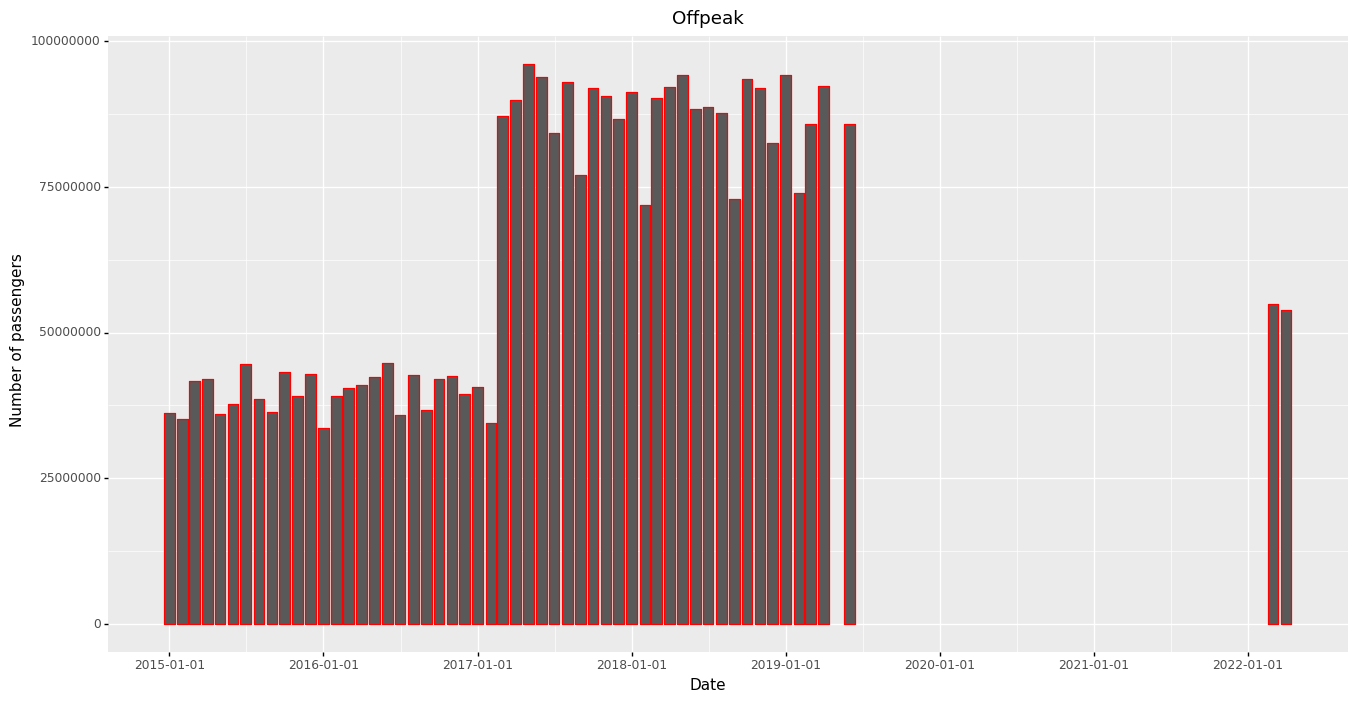

<ggplot: (305785175)>

In [73]:
(
    ggplot(offpeak, aes('month', 'num_passengers')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Number of passengers", title="Offpeak")
)

## Peak

In [77]:
peak = passengers[passengers.period=='peak']
peak.head(12)

,period,month,num_passengers
55,peak,2015-01-01,36919094.1
56,peak,2015-02-01,39079179.1
57,peak,2015-03-01,47410376.9
58,peak,2015-04-01,42995453.0
59,peak,2015-05-01,40422401.7
60,peak,2015-06-01,41906828.1
61,peak,2015-07-01,43644613.1
62,peak,2015-08-01,42477644.1
63,peak,2015-09-01,39377966.1
64,peak,2015-10-01,49968324.0


In [85]:
peak.tail(24)

,period,month,num_passengers
86,peak,2017-08-01,103292572.2
87,peak,2017-09-01,83131029.3
88,peak,2017-10-01,107557008.7
89,peak,2017-11-01,104010989.2
90,peak,2017-12-01,93558710.1
91,peak,2018-01-01,102420195.1
92,peak,2018-02-01,88177017.0
93,peak,2018-03-01,103117515.9
94,peak,2018-04-01,97926686.3
95,peak,2018-05-01,108224497.6


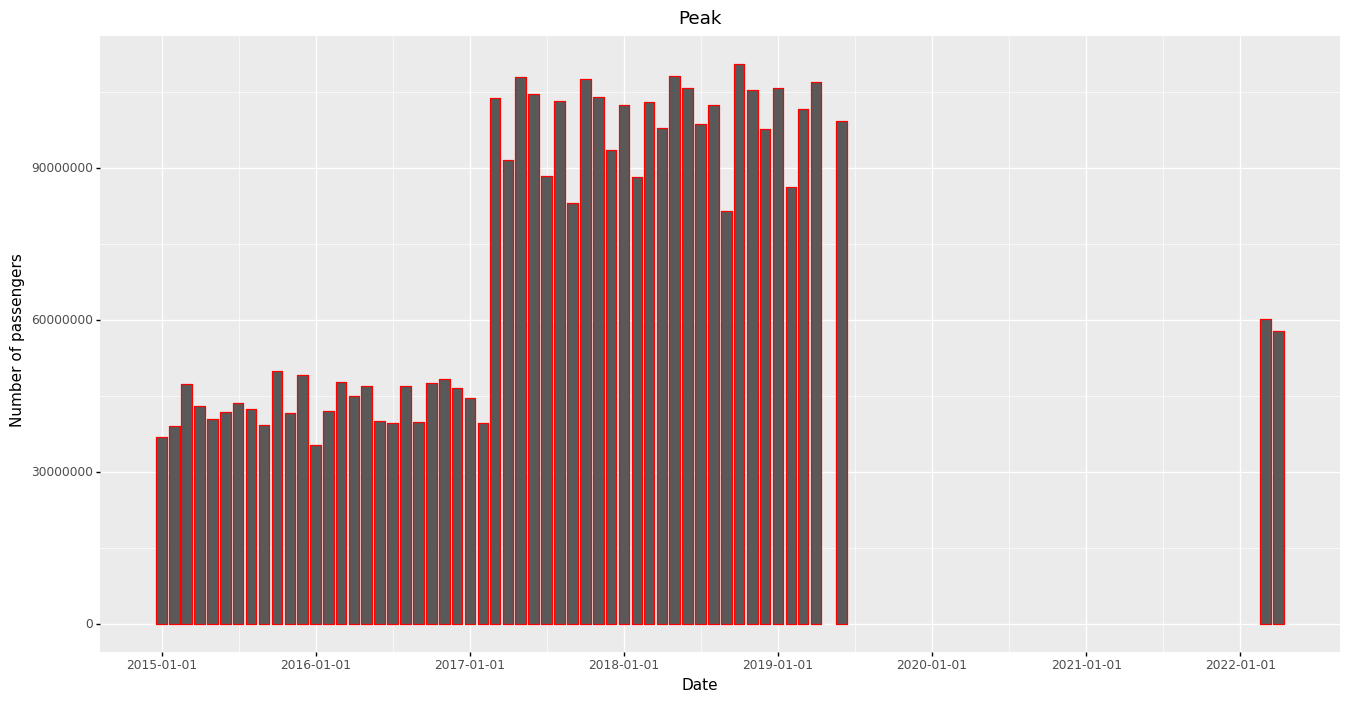

<ggplot: (305764830)>

In [79]:
(
    ggplot(peak, aes('month', 'num_passengers')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Number of passengers", title="Peak")
)

In [95]:
passengers.resample('Q', on='month').num_passengers.sum().to_frame().tail(14)

,num_passengers
month,
2019-03-31,547798281.6
2019-06-30,384473398.6
2019-09-30,0.0
2019-12-31,0.0
2020-03-31,0.0
2020-06-30,0.0
2020-09-30,0.0
2020-12-31,0.0
2021-03-31,0.0


In [91]:
df2.division.value_counts()

B DIVISION    928
A DIVISION    880
Name: division, dtype: int64